Loading libraries

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-resumable-media 1.2.0 requires google-crc32c<2.0dev,>=1.0; python_version >= "3.5", which is not installed.


  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=7386e1baa2a55a0fa31ad8ec32e8276636475105a7a2a5ecd003b46c6b07f8dc
  Stored in directory: c:\users\villacorta\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.38.0
    Uninstalling grpcio-1.38.0:
      Successfully uninstalled grpcio-1.38.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [4]:
#################################################################
#MultilayerPerceptron with keras
#Author: Edwyn Javier Aldana
################################################################
#Load libraries
#######################################################################################
#                           TensorFlow and tf.keras
#######################################################################################
import tensorflow as tf
from tensorflow import keras
#######################################################################################
#                              Other libraries
#######################################################################################
import numpy as np
import matplotlib.pyplot as plt

Getting dataset, in this case, we use an standard dataset from NIST

In [5]:
#Load dataset
#######################################################################################
#                                     Get data images
#######################################################################################
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Exploring the dataset: We show a sample of training dataset and present some properties of traning and test dataset.

(60000, 28, 28)
(10000, 28, 28)


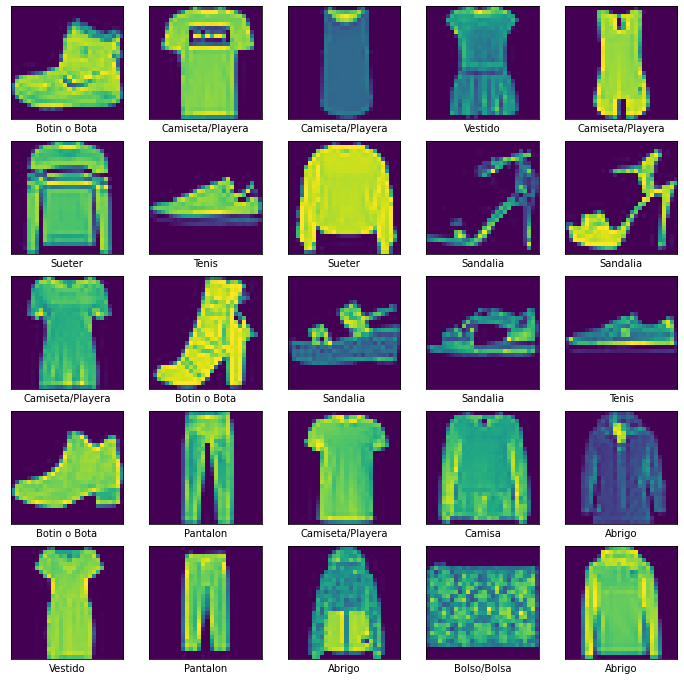

In [6]:
#Explore data images
#Mapping the label number to the following text labels
class_names = ['Camiseta/Playera', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolso/Bolsa', 'Botin o Bota']
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
#Datasets cardinality
print(train_images.shape) #60000 images with size of 28x28 pixel
print(test_images.shape) #10000 images with size of 28x28 pixel


Pre-processing dataset

In [7]:
#Scaling  images between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images[1].shape

(28, 28)

Building a neural network

In [8]:
#Define the network architecture: 1) Input, Hidden and Output.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input Layer
    keras.layers.Dense(128, activation=tf.nn.relu), #Hidden Layer
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output Layer
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training process

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4997 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.3764 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2987 - accuracy: 0.8902


Testing process

NameError: name 'plot_image' is not defined

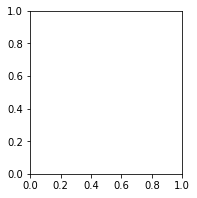

In [10]:
predictions = model.predict(test_images)
id_image=10 #Change the number of image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(id_image, class_names,predictions,  test_labels)



Function to display predictions

In [ ]:
#Utilitary functions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, labels, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks(labels)
    plt.xticks(np.arange(10), labels, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xlabel('class', fontsize=10)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

